In [5]:
import finesse
from finesse.parse import KatParser
from finesse.utilities.xaxis import xaxis, x2axis, noxaxis
from finesse.frequency import generate_frequency_list
        
import matplotlib.pyplot as plt

finesse.LOGGER.setLevel("WARN")

In [6]:
import finesse
from finesse.parse import KatParser
from finesse.utilities.xaxis import x2axis

k = KatParser()

k.parse("""
l l1 1 0 n0
s s1 0 n0 n1 
mod eo1 40k .1 3 pm n1 n2

l l2 1 1M n3
s s2 0 n3 n4
mod eo2 40k .2 3 pm n4 n5

l l3 1 1M n6
s s3 0 n6 n7
mod eo3 40k .3 3 pm n7 n8

ad bessel0 0 n2
ad bessel1 2 n2
ad bessel2 2 n2
ad bessel3 3 n2
""")

ifo = k.build()

ifo.bessel0.f = ifo.l1.f.ref
ifo.bessel1.f = ifo.l1.f.ref + 1*ifo.eo1.f.ref
ifo.bessel2.f = ifo.l1.f.ref + 2*ifo.eo1.f.ref
ifo.bessel3.f = ifo.l1.f.ref + 3*ifo.eo1.f.ref

out = x2axis(ifo.l1.f, 0, 1, 2, ifo.eo2.f, 40e3, 80e3, 2)

In [7]:
# These should all just be the same numbers for each detector as the correct frequency bins are being tracked
out['bessel0'], out['bessel1'], out['bessel2'], out['bessel3']

(array([[0.99750156+0.j, 0.99750156+0.j],
        [0.99750156+0.j, 0.99750156+0.j]]),
 array([[3.05779157e-18+0.04993753j, 3.05779157e-18+0.04993753j],
        [3.05779157e-18+0.04993753j, 3.05779157e-18+0.04993753j]]),
 array([[-0.00124896+1.52953322e-19j, -0.00124896+1.52953322e-19j],
        [-0.00124896+1.52953322e-19j, -0.00124896+1.52953322e-19j]]),
 array([[-3.82462996e-21-2.08203158e-05j, -3.82462996e-21-2.08203158e-05j],
        [-3.82462996e-21-2.08203158e-05j, -3.82462996e-21-2.08203158e-05j]]))

In [8]:
k = KatParser()

k.parse("""
l l1 1 0 n0
s s1 0 n0 n1 
mod eo1 40k .1 1 pm n1 n2
s s2 1 n2 n3
m m1 0.99 0.01 0 n3 n4
s s3 1 n4 n5
m m2 0.99 0.01 0 n5 n6

ad R 0 n3
ad C 0 n5
ad T 0 n6
""")

ifo = k.build()
out = xaxis(ifo.m1.phi, -100, 280, 1000)

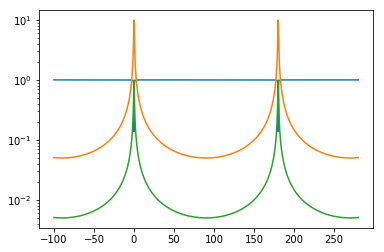

In [9]:
plt.semilogy(out.x1, abs(out['R']))
plt.semilogy(out.x1, abs(out['C']))
plt.semilogy(out.x1, abs(out['T']))

In [10]:
k = KatParser()

k.parse("""
l l1 1 0 n0
s s1 0 n0 n1 
mod eo1 40k .1 1 pm n1 n2
s s2 1 n2 n3
m m1 0.99 0.01 0 n3 n4
s s3 1 n4 n5
m m2 0.9999 0.0001 0 n5 n6

ad R 0 n3
ad C 0 n5
ad T 0 n6
""")
ifo = k.build()

ifo.m1.T = 1-ifo.m1.R.ref
ifo.add(finesse.detectors.SymbolDetector('m1_T', ifo.m1.T, float))

out = xaxis(ifo.m1.R, 0.95, 0.99999, 1000)

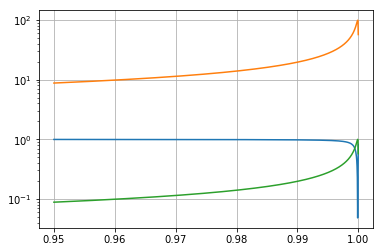

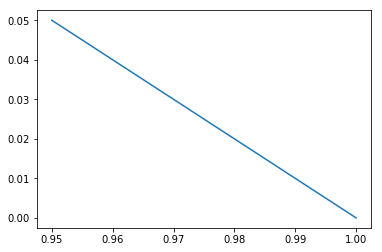

In [11]:

plt.semilogy(out.x1, abs(out['R']))
plt.semilogy(out.x1, abs(out['C']))
plt.semilogy(out.x1, abs(out['T']))
plt.grid()
plt.figure()
plt.plot(out.x1, out['m1_T'])

In [12]:
from copy import deepcopy, copy

In [13]:
import finesse
from finesse.parse import KatParser
from finesse.utilities.xaxis import xaxis
from copy import deepcopy
finesse.LOGGER.setLevel("INFO")

k = KatParser()

k.parse("""
l l1 1 0 n0
s s1 0 n0 n1 
mod eo1 40k .1 1 pm n1 n2
s s2 1 n2 n3
m m1 0.99 0.01 0 n3 n4
s s3 1 n4 n5
m m2 0.9999 0.0001 0 n5 n6

ad R 0 n3
ad C 0 n5
ad T 0 n6
""")
ifo = k.build()

ifo.m1.T = 1-ifo.m1.R.ref
ifo.add(finesse.detectors.SymbolDetector('m1_T', ifo.m1.T, float))
_ifo = deepcopy(ifo)

finesse.parse            :INFO    : Parsed from user input
finesse.parse            :INFO    : Building model


In [14]:
out1 = xaxis(ifo.l1.P, 0.9, 0.9999, 10)

finesse.utilities.xaxis  :INFO    : Scanning parameters [<l1.P=1 @ 0x10f591588>]
finesse.model            :INFO    : Toggle parameter lock to True
finesse.model            :INFO    : <l1.P=1 @ 0x10f591588> is not being locked
finesse.simulation       :INFO    : Outputting shape=(10,) dtype=[('R', <class 'numpy.complex128'>), ('C', <class 'numpy.complex128'>), ('T', <class 'numpy.complex128'>), ('m1_T', <class 'float'>)]
finesse.simulation       :INFO    : Building DC simulation
finesse.simulation       :INFO    : Generating simulation with carrier frequencies [l1.f (eo1.f*-1+l1.f) (eo1.f*1+l1.f)]
finesse.components.mirror:INFO    : No knm dependent parameters have changed, skipping recomputation of knm matrices for: m1
finesse.components.mirror:INFO    : No knm dependent parameters have changed, skipping recomputation of knm matrices for: m2
finesse.components.modula:INFO    : No knm dependent parameters have changed, skipping recomputation of knm matrices for:eo1
finesse.components.sp

In [15]:
out2 = xaxis(_ifo.l1.P, 0.9, 0.999, 10)

finesse.utilities.xaxis  :INFO    : Scanning parameters [<l1.P=1 @ 0x110b71438>]
finesse.model            :INFO    : Toggle parameter lock to True
finesse.model            :INFO    : <l1.P=1 @ 0x110b71438> is not being locked
finesse.simulation       :INFO    : Outputting shape=(10,) dtype=[('R', <class 'numpy.complex128'>), ('C', <class 'numpy.complex128'>), ('T', <class 'numpy.complex128'>), ('m1_T', <class 'float'>)]
finesse.simulation       :INFO    : Building DC simulation
finesse.simulation       :INFO    : Generating simulation with carrier frequencies [l1.f (eo1.f*-1+l1.f) (eo1.f*1+l1.f)]
finesse.components.mirror:INFO    : No knm dependent parameters have changed, skipping recomputation of knm matrices for: m1
finesse.components.mirror:INFO    : No knm dependent parameters have changed, skipping recomputation of knm matrices for: m2
finesse.components.modula:INFO    : No knm dependent parameters have changed, skipping recomputation of knm matrices for:eo1
finesse.components.sp

In [16]:
# diff
list(sum(abs(out1[:][_] - out2[:][_])) for _ in out1.outputs)

ValueError: no field of name _Output__outputs

In [17]:
import finesse
from finesse.parse import KatParser
from finesse.utilities.xaxis import xaxis
from copy import deepcopy

k = KatParser()

k.parse("""
l l1 1 10 n0
s s1 0 n0 n1 
mod eo1 40k .1 2 pm n1 n2
s s2 1 n2 n3
m m1 0.99 0.01 0 n3 n4
s s3 1 n4 n5
m m2 0.9999 0.0001 0 n5 n6

ad circ_c 0 n5
ad circ_u 0 n5
ad circ_l 0 n5
""")

ifo = k.build()

ifo.fsig = 10

# No need to do puts or anything now, just using symbols we can say what carrier to look at
ifo.circ_c.f = ifo.l1.f.ref + 2*ifo.eo1.f.ref
# reference other detector to get the carrier frequency and then find the audio sidebands
ifo.circ_u.f = ifo.circ_c.f + ifo.fsig.ref
ifo.circ_l.f = ifo.circ_c.f - ifo.fsig.ref

# scan the audio frequency
out = xaxis(ifo.fsig, 10, 10e3, 10)

out['circ_c'], out['circ_u'], out['circ_l']

finesse.parse            :INFO    : Parsed from user input
finesse.parse            :INFO    : Building model


AttributeError: 'int' object has no attribute 'ref'